In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/DATA QUALITY MANAGEMENT')

In [240]:
%cd /content/drive/My Drive/Colab Notebooks/DATA QUALITY MANAGEMENT

/content/drive/My Drive/Colab Notebooks/DATA QUALITY MANAGEMENT


In [241]:
import pandas as pd
import numpy as np
import random
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from faker import Faker

In [242]:
def generate_valid_email():
    # Generate a random email prefix
    prefix = generate_prefix()

    # Generate a random email domain
    domain = generate_domain()

    # Concatenate prefix and domain to form the email address
    email = f"{prefix}@{domain}"

    return email

def generate_email_data_faker(num_emails=10):
    fake = Faker()
    return fake.email()

def generate_prefix():
    # Define allowed characters for the prefix
    allowed_chars = string.ascii_letters + string.digits + "_.-"

    # Initialize prefix
    prefix = ""

    # Generate random length for prefix
    prefix_length = random.randint(1, 10)

    # Generate prefix
    for _ in range(prefix_length):
        char = random.choice(allowed_chars)
        prefix += char

    return prefix

def generate_domain():
    # Define allowed characters for the domain
    allowed_chars = string.ascii_lowercase + string.digits

    # Generate random number of subdomains (maximum 2)
    num_subdomains = random.randint(0, 2)

    # Initialize domain
    domain = ""

    # Generate subdomains
    for _ in range(num_subdomains):
        subdomain_length = random.randint(2, 4)  # Limit subdomain length for variety
        subdomain = ''.join(random.choices(allowed_chars, k=subdomain_length))
        domain += subdomain + '.'

    # Generate random length for main domain
    domain_length = random.randint(2, 10)  # Limit main domain length for variety
    main_domain = ''.join(random.choices(allowed_chars, k=domain_length))
    domain += main_domain

    # Add a top-level domain (TLD)
    tld_length = random.randint(2, 4)  # Limit TLD length for variety
    tld = ''.join(random.choices(string.ascii_lowercase, k=tld_length))
    domain += f'.{tld}'

    return domain

def generate_invalid_email():

  # Define forbidden characters for email addresses
  forbidden_chars = ['!', '#', '$', '%', '^', '&', '*', '(', ')', '{', '}', '[', ']', ':', ';', '<', '>', '?', '/', '\\', '|', '+', '=', ' ']

  # Generate a random username
  username = ''.join(random.choices(string.ascii_letters + string.digits, k=random.randint(5, 10)))

  # Introduce a forbidden character randomly in the username
  if random.random() < 0.5:
      forbidden_char = random.choice(forbidden_chars)
      username = username[:random.randint(0, len(username))] + forbidden_char + username[random.randint(0, len(username)):]

  # Generate a random placeholder domain (single or double)
  domain_parts = []
  num_domain_parts = random.randint(1, 2)
  for _ in range(num_domain_parts):
      domain_part = ''.join(random.choices(string.ascii_lowercase, k=random.randint(5, 10)))
      domain_parts.append(domain_part)

  domain = '.'.join(domain_parts)

  # Introduce a forbidden character randomly in the domain
  if random.random() < 0.5:
      forbidden_char = random.choice(forbidden_chars)
      domain = domain[:random.randint(0, len(domain))] + forbidden_char + domain[random.randint(0, len(domain)):]

  # Concatenate username and domain to form the email address
  email = f"{username}@{domain}"

  # Introduce cases for invalid email formats
  random_num = random.random()
  if random_num < 0.1:  # 10% chance of generating email with two "@" characters
      email = f"{username}@{domain}@{domain_parts[-1]}"
  elif random_num < 0.2:  # 10% chance of generating email without "@" character
      email = ''.join(random.choices(string.ascii_lowercase, k=random.randint(5, 10)))
  elif random_num < 0.3:  # 10% chance of generating invalid email patterns with random domain
      random_domain = ''.join(random.choices(string.ascii_lowercase, k=random.randint(5, 10)))
      email = f"{username}{random_domain}"  # No "@" here

  return email

def validate_email(text):
    pattern = r'^[a-zA-Z0-9._-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    if re.match(pattern, text):
        return 1
    else:
        return 0

def fix_email(text):
    # Remove allowed character in the first and last string
    cleaned_String = re.sub(r'^[^\w]+|[^\w]+$', '', text)
    # Replace special character and numbers in the middle of string with space
    cleaned_string = re.sub(r"[^a-zA-Z0-9_.@-]", '', cleaned_String)
    # Remove non alphabetic character except space
    cleaned_string = re.sub(r'\s{2,}', r' ', cleaned_string)
    # Look for sequential punctuation
    matches = re.findall(r'([^\w\s])\1+', cleaned_string)
    # Remove it
    for match in matches:
        cleaned_string = cleaned_string.replace(match, match[0])

    return cleaned_string.strip()


In [243]:
data  = []
initial_label = []
check_type = []

for _ in range(1000):
  data.append(generate_valid_email())
  initial_label.append(1)
  check_type.append('email')

for _ in range(500):
  data.append(generate_email_data_faker())
  initial_label.append(1)
  check_type.append('email')

for _ in range(1000):
  data.append(generate_invalid_email())
  initial_label.append(0)
  check_type.append('email')

In [244]:
dataset = pd.DataFrame({"text" : data, 'initial_label' : initial_label, 'data_type': check_type})
dataset.to_csv('dataset/email_dataset.csv')
dataset

,text,initial_label,data_type
0,XcpdE88mLd@5v.n5y.wd,1,email
1,jJvLr0J@et.ru.p3t.rb,1,email
2,hXPX@venno5.pege,1,email
3,Q@7ar.eg.typ15r7x.qzzq,1,email
4,gVkikOySV@j9j0.dfq.3r0gj8qa5.tng,1,email
...,...,...,...
2495,mxbfd,0,email
2496,LIsnV@totvrxxcl@totvrxxcl,0,email
2497,mFAd20itG@doexqnzlr.terchccrb,0,email
2498,:ZkEcCcGBVm@epsvapshq.waltn:q.waltnaybgd,0,email


In [245]:
dataset['label'] = dataset['text'].apply(lambda x: validate_email(x))
dataset['clean'] = dataset.apply(lambda x: fix_email(str(x['text'])) if x['label'] == False else x['text'], axis=1)
dataset['check'] = dataset['clean'].apply(lambda x: validate_email(x))

dataset

,text,initial_label,data_type,label,clean,check
0,XcpdE88mLd@5v.n5y.wd,1,email,1,XcpdE88mLd@5v.n5y.wd,1
1,jJvLr0J@et.ru.p3t.rb,1,email,1,jJvLr0J@et.ru.p3t.rb,1
2,hXPX@venno5.pege,1,email,1,hXPX@venno5.pege,1
3,Q@7ar.eg.typ15r7x.qzzq,1,email,1,Q@7ar.eg.typ15r7x.qzzq,1
4,gVkikOySV@j9j0.dfq.3r0gj8qa5.tng,1,email,1,gVkikOySV@j9j0.dfq.3r0gj8qa5.tng,1
...,...,...,...,...,...,...
2495,mxbfd,0,email,0,mxbfd,0
2496,LIsnV@totvrxxcl@totvrxxcl,0,email,0,LIsnV@totvrxxcl@totvrxxcl,0
2497,mFAd20itG@doexqnzlr.terchccrb,0,email,1,mFAd20itG@doexqnzlr.terchccrb,1
2498,:ZkEcCcGBVm@epsvapshq.waltn:q.waltnaybgd,0,email,0,ZkEcCcGBVm@epsvapshq.waltnq.waltnaybgd,1


In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [247]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, SpatialDropout1D, Embedding, Dropout
import numpy as np

data = dataset
max_words = 1000

# Preprocessing data
vectorizer = CountVectorizer(max_features=max_words, analyzer='char')
X = vectorizer.fit_transform(data['text'].values).toarray()

# Definisikan model
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train-test split
Y = data['label'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [248]:
# Training model
history = model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_data=(X_test, Y_test))

# Evaluasi model
score, acc = model.evaluate(X_test, Y_test, batch_size=32)
print("Accuracy: %.2f%%" % (acc*100))

Epoch 1/15
63/63 [==============================] - 1s 4ms/step - loss: 0.5974 - accuracy: 0.6705 - val_loss: 0.4498 - val_accuracy: 0.8000
Epoch 2/15
63/63 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8325 - val_loss: 0.2633 - val_accuracy: 0.9120
Epoch 3/15
63/63 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.8840 - val_loss: 0.1954 - val_accuracy: 0.9400
Epoch 4/15
63/63 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9075 - val_loss: 0.1506 - val_accuracy: 0.9500
Epoch 5/15
63/63 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9325 - val_loss: 0.1295 - val_accuracy: 0.9560
Epoch 6/15
63/63 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9440 - val_loss: 0.1180 - val_accuracy: 0.9560
Epoch 7/15
63/63 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9460 - val_loss: 0.1138 - val_accuracy: 0.9580
Epoch 8/15
63/63 [==

In [249]:
#Save models dan feature vector to directory

import pickle

model.save("model/email_validation_single_lstm_model.keras")

with open('model/email_validation_single_lstm_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

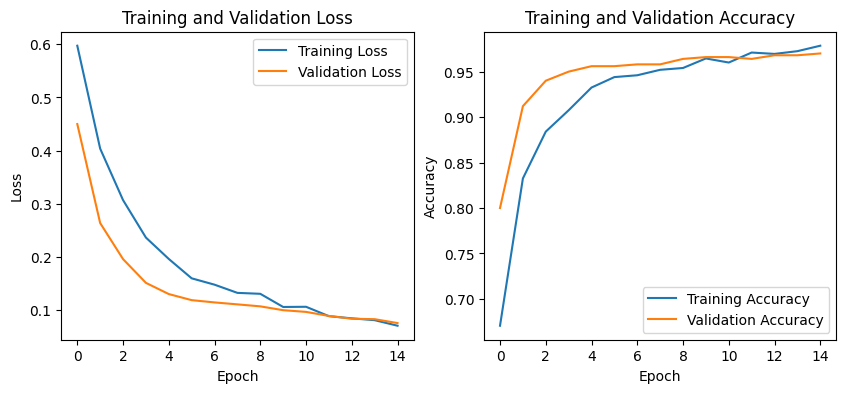

In [250]:
# Visualisasi loss dan akurasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [251]:
# Predictions
Y_pred_prob = model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(Y_test, Y_pred))

16/16 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       189
           1       0.98      0.97      0.98       311

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [252]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Predictions on training and validation set
Y_train_pred = logreg.predict(X_train)
Y_test_pred = logreg.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)

# Classification report
print("Classification Report:")
print(classification_report(Y_test, Y_test_pred))

Training Accuracy: 0.9735
Validation Accuracy: 0.964
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       189
           1       0.97      0.97      0.97       311

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [253]:
#Save Logistic Regression Models
from joblib import dump
dump(logreg, 'model/email_validation_single_logistic_regression_model.joblib')

['model/email_validation_single_logistic_regression_model.joblib']

In [254]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

# Predictions on training and validation set
Y_train_pred_xgb = xgb_model.predict(X_train)
Y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy_xgb = accuracy_score(Y_train, Y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(Y_test, Y_test_pred_xgb)
print("Training Accuracy (XGBoost):", train_accuracy_xgb)
print("Validation Accuracy (XGBoost):", test_accuracy_xgb)

# Classification report
print("Classification Report (XGBoost):")
print(classification_report(Y_test, Y_test_pred_xgb))

Training Accuracy (XGBoost): 1.0
Validation Accuracy (XGBoost): 0.974
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       189
           1       0.97      0.99      0.98       311

    accuracy                           0.97       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [255]:
#Save XGboost Models
from joblib import dump
dump(xgb_model, 'model/email_validation_single_xgboost_model.joblib')

['model/email_validation_single_xgboost_model.joblib']

In [256]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)

# Predictions on training and validation set
Y_train_pred_svm = svm_model.predict(X_train)
Y_test_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
train_accuracy_svm = accuracy_score(Y_train, Y_train_pred_svm)
test_accuracy_svm = accuracy_score(Y_test, Y_test_pred_svm)
print("Training Accuracy (SVM):", train_accuracy_svm)
print("Validation Accuracy (SVM):", test_accuracy_svm)

# Classification report
print("Classification Report (SVM):")
print(classification_report(Y_test, Y_test_pred_svm))


Training Accuracy (SVM): 0.9845
Validation Accuracy (SVM): 0.98
Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       189
           1       0.97      1.00      0.98       311

    accuracy                           0.98       500
   macro avg       0.98      0.97      0.98       500
weighted avg       0.98      0.98      0.98       500



In [257]:
#Save SVM Models
from joblib import dump
dump(svm_model, 'model/email_validation_single_svm_model.joblib')

['model/email_validation_single_svm_model.joblib']

In [258]:
from sklearn.tree import DecisionTreeClassifier
import joblib

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Predictions on training and validation set
Y_train_pred_dt = dt_model.predict(X_train)
Y_test_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
train_accuracy_dt = accuracy_score(Y_train, Y_train_pred_dt)
test_accuracy_dt = accuracy_score(Y_test, Y_test_pred_dt)
print("Training Accuracy (Decision Tree):", train_accuracy_dt)
print("Validation Accuracy (Decision Tree):", test_accuracy_dt)

# Classification report
print("Classification Report (Decision Tree):")
print(classification_report(Y_test, Y_test_pred_dt))


Training Accuracy (Decision Tree): 1.0
Validation Accuracy (Decision Tree): 1.0
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       311

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [259]:
#Save DT Models
from joblib import dump
dump(dt_model, 'model/email_validation_single_dt_model.joblib')

['model/email_validation_single_dt_model.joblib']

In [260]:
#Prediction Using LSTM
from keras.models import load_model
import pickle

# Load Trained Model
model = load_model("model/email_validation_single_lstm_model.keras")

# Load Tokenizer from directory
with open('model/email_validation_single_lstm_vectorizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# To be Predicted
new_data = ["masharry.net@gmail.com", "user@domain", "john.doe@example", 'invalid-email.com']

# Feature Extraction
new_data_extract = tokenizer.transform(new_data).toarray()

# Perform prediction using LSTM Models
predictions = model.predict(new_data_extract)

# Show prediction result
for name, prediction in zip(new_data, predictions):
    label = "Valid" if prediction > 0.5 else "Invalid"
    confidence = prediction[0] if prediction > 0.5 else 1 - prediction[0]
    print(f"Nama: {name}, Prediksi: {label}, Accuracy: {confidence:.2f}")


1/1 [==============================] - 0s 53ms/step
Nama: masharry.net@gmail.com, Prediksi: Valid, Accuracy: 1.00
Nama: user@domain, Prediksi: Invalid, Accuracy: 0.92
Nama: john.doe@example, Prediksi: Valid, Accuracy: 1.00
Nama: invalid-email.com, Prediksi: Valid, Accuracy: 1.00


In [261]:
#Prediction using Logistic Regression Model
from joblib import load

# Memuat model logistic regression dari file
logreg = load('model/email_validation_single_logistic_regression_model.joblib')

# Data baru untuk diprediksi
new_data = ["masharry.net@gmail.com", "user@domain", "john.doe@example", 'invalid-email.com','christopherlee@example.com']

# Load Tokenizer from directory
with open('model/email_validation_single_lstm_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Transformasi data baru menggunakan vectorizer yang telah diproses sebelumnya
new_data_transformed = vectorizer.transform(new_data)

# Melakukan prediksi
predictions = xgb_model.predict(new_data_transformed)

# Menampilkan hasil prediksi
for name, prediction in zip(new_data, predictions):
    label = "Valid" if prediction == 1 else "Invalid"
    print(f"Nama: {name}, Prediksi: {label}")

Nama: masharry.net@gmail.com, Prediksi: Invalid
Nama: user@domain, Prediksi: Invalid
Nama: john.doe@example, Prediksi: Invalid
Nama: invalid-email.com, Prediksi: Invalid
Nama: christopherlee@example.com, Prediksi: Invalid
